## 2.6. Probability and Statistics
https://d2l.ai/chapter_preliminaries/probability.html


## (1) Giảm phương sai khi số lần quan sát n tăng lên

## (2) Kiểm nghiệm bất đẳng thức Chebyshev

## (3) Kiểm nghiệm Định lý Giới hạn Trung tâm (CLT)

## 2.6.8. Exercises 3

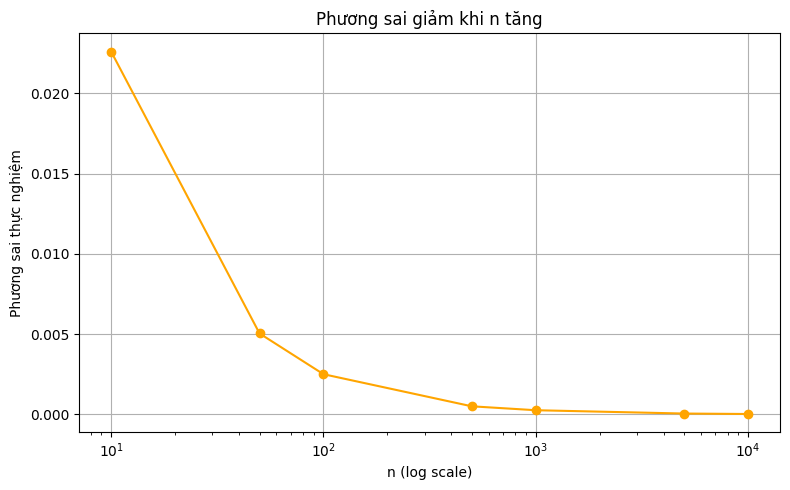

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Thiết lập hạt giống để tái lập kết quả
np.random.seed(42)

# Thông số chung
p = 0.5                    # Xác suất mặt ngửa
eps = 0.05                 # Ngưỡng epsilon cho Chebyshev
n_values = [10, 50, 100, 500, 1000, 5000, 10000]  # Các giá trị n
num_trials = 1000         # Số lần mô phỏng cho mỗi n

# Danh sách lưu kết quả
variances = []
chebyshev_bounds = []
chebyshev_empirical = []

# Vòng lặp qua các giá trị n
for n in n_values:
    # Sinh num_trials mẫu Bernoulli, mỗi mẫu có n quan sát
    samples = np.random.binomial(1, p, (num_trials, n))
    
    # Tính ước lượng p̂
    estimates = np.mean(samples, axis=1)
    
    # 1. Tính phương sai thực nghiệm
    var_empirical = np.var(estimates)
    variances.append(var_empirical)
    
    # 2. Kiểm nghiệm Chebyshev
    cheb_bound = p * (1 - p) / (n * eps**2)
    chebyshev_bounds.append(cheb_bound)
    
    cheb_actual = np.mean(np.abs(estimates - p) >= eps)
    chebyshev_empirical.append(cheb_actual)

# 3. Kiểm nghiệm CLT với n lớn
n_clt = 1000
samples_clt = np.random.binomial(1, p, (num_trials, n_clt))
estimates_clt = np.mean(samples_clt, axis=1)
z_scores = np.sqrt(n_clt) * (estimates_clt - p)

# ===============================================
# VẼ CÁC BIỂU ĐỒ TRỰC QUAN HÓA KẾT QUẢ TÍNH TOÁN
# ===============================================

# Biểu đồ 1: Giảm phương sai theo n
plt.figure(figsize=(8,5))
plt.plot(n_values, variances, marker='o', color='orange')
plt.xscale("log")
plt.xlabel("n (log scale)")
plt.ylabel("Phương sai thực nghiệm")
plt.title("Phương sai giảm khi n tăng")
plt.grid(True)
plt.tight_layout()
plt.show()



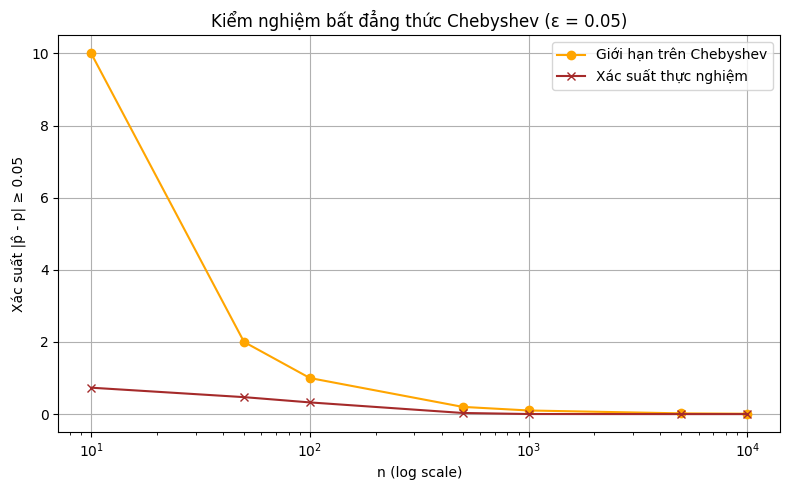

In [13]:
# Biểu đồ 2: Kiểm nghiệm BĐT Chebyshev
plt.figure(figsize=(8,5))
plt.plot(n_values, chebyshev_bounds, label="Giới hạn trên Chebyshev", marker='o', color='orange')
plt.plot(n_values, chebyshev_empirical, label="Xác suất thực nghiệm", marker='x', color='brown')
plt.xscale("log")
plt.xlabel("n (log scale)")
plt.ylabel(f"Xác suất |p̂ - p| ≥ {eps}")
plt.title(f"Kiểm nghiệm bất đẳng thức Chebyshev (ε = {eps})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




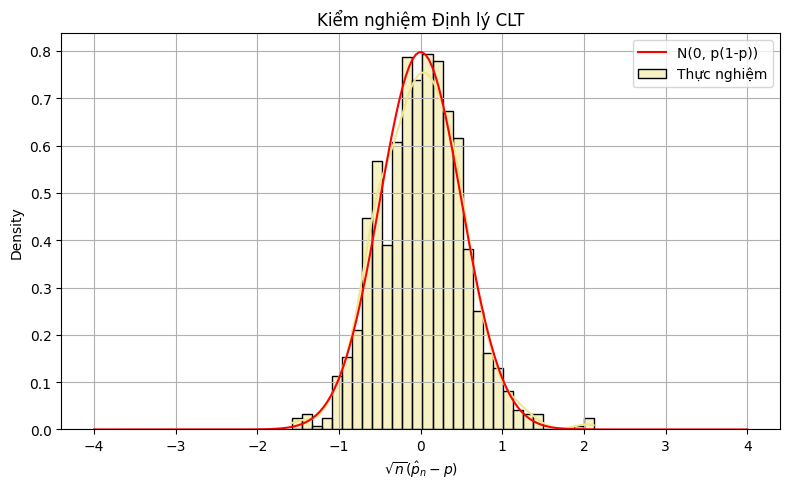

In [14]:
# Biểu đồ 3: Histogram kiểm nghiệm CLT
plt.figure(figsize=(8,5))
sns.histplot(z_scores, bins=30, kde=True, stat="density", label="Thực nghiệm", color='khaki', edgecolor='black')
x = np.linspace(-4, 4, 200)
plt.plot(x, norm.pdf(x, 0, np.sqrt(p*(1-p))), label="N(0, p(1-p))", color='red')
plt.xlabel(r"$\sqrt{n}(\hat{p}_n - p)$")
plt.title("Kiểm nghiệm Định lý CLT")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Kiểm nghiệm Định lý Giới hạn Trung tâm (CLT) với các giá trị xác suất khác nhau: 𝑝 = 0.1, 0.3, 0.5, 0.7, 0.9

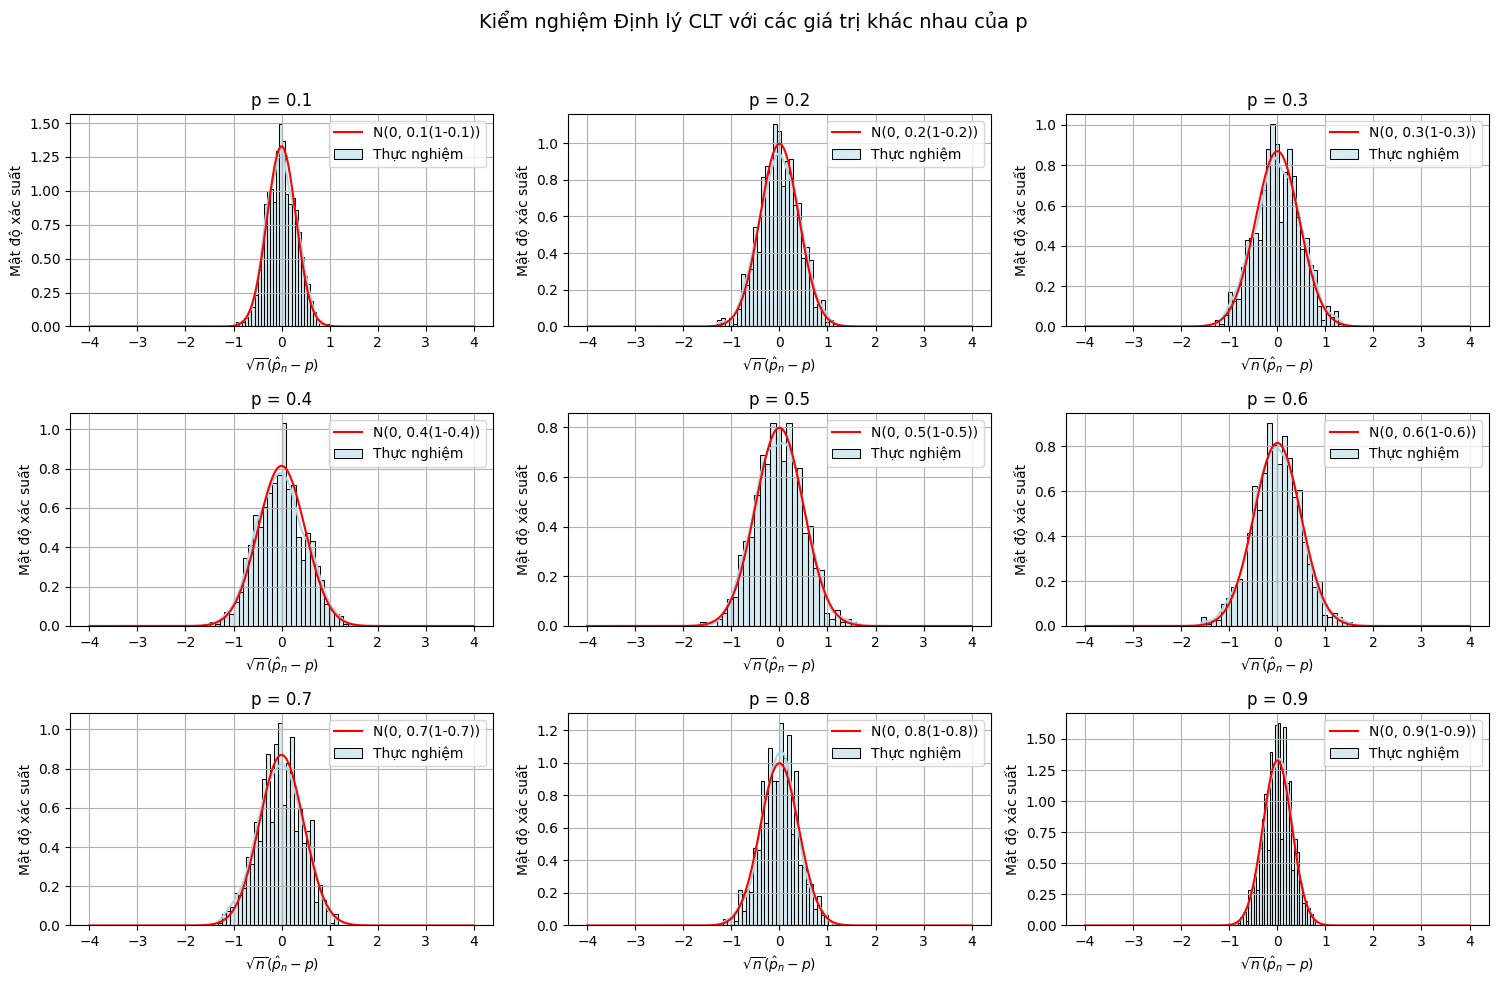

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Các giá trị p để kiểm nghiệm
p_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
n_clt = 1000        # Số lần quan sát
num_trials = 1000   # Số lần mô phỏng

# Tạo lưới 3x3 để đủ 9 biểu đồ
plt.figure(figsize=(15, 10))

for i, p in enumerate(p_values, 1):
    samples = np.random.binomial(1, p, (num_trials, n_clt))
    estimates = np.mean(samples, axis=1)
    z_scores = np.sqrt(n_clt) * (estimates - p)

    plt.subplot(3, 3, i)  # Lưới 3 hàng x 3 cột
    sns.histplot(z_scores, bins=30, kde=True, stat="density",
                 color='lightblue', edgecolor='black', label="Thực nghiệm")

    x = np.linspace(-4, 4, 200)
    std_dev = np.sqrt(p * (1 - p))
    plt.plot(x, norm.pdf(x, 0, std_dev), 'r-', label=f'N(0, {p}(1-{p}))')

    plt.title(f"p = {p}")
    plt.xlabel(r"$\sqrt{n}(\hat{p}_n - p)$")
    plt.ylabel("Mật độ xác suất")
    plt.legend()
    plt.grid(True)

plt.suptitle("Kiểm nghiệm Định lý CLT với các giá trị khác nhau của p", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
